In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

#Loading and reading the data set
data = pd.read_csv("breast-cancer.csv")

#Display initial data preview
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [22]:
#Checking for missing values
Missing_values = data.isnull().sum()
print("\n **Missing Values ** ")
print(Missing_values)


 **Missing Values ** 
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [23]:
# Non - Null values 
print("\n ** Non- null Values **")
data.info()


 ** Non- null Values **
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  p

In [24]:
#Summary of statistics
Summary = data.describe()
print("\n ** Summary Statistics **")
print(Summary)

# Convert 'diagnosis' column to numeric
data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})  # M → 1, B → 0


 ** Summary Statistics **
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.01

In [25]:
#Spilting the features and the target
X = data.drop("diagnosis",axis = 1)
y = data["diagnosis"]

# Spiltting the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Training the model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred =model.predict(X_test)
print(y_pred)

#Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 1 1]
[[70  1]
 [ 2 41]]


In [27]:
# Evaluating Metrics
print("\n ** Model Evaluation** ")
accuracy =accuracy_score(y_test,y_pred)
print(f"Accuracy : {accuracy : .4f}")
precision = precision_score(y_test,y_pred)
print(f"Precision : {precision :.4f}")
recall = recall_score(y_test,y_pred)
print(f"Recall : {recall : .4f}")
f1 = f1_score(y_test,y_pred)
print(f"F1 Score : {f1 : .4f}")


 ** Model Evaluation** 
Accuracy :  0.9737
Precision : 0.9762
Recall :  0.9535
F1 Score :  0.9647


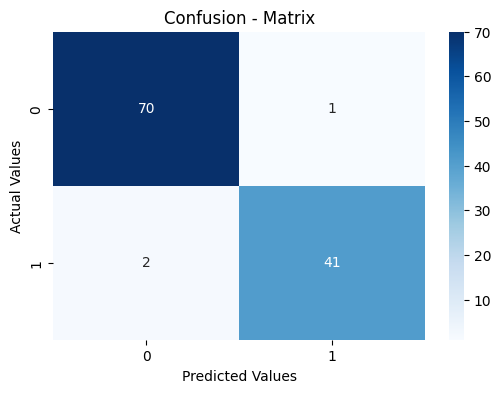

In [28]:
# Visualization of confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot = True,cmap="Blues")
plt.title("Confusion - Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [ ]:
#cross validation
scores = cross_val_score(model,X_train, y_train, cv= 10,scoring="accuracy")
print(f"Test accuracy :{accuracy: .2f}")
print(f"Cross validation accuracy :{scores.mean() : .2f}")

Test accuracy : 0.97
Cross validation accuracy : 0.97
